# Метрическая классификация. Метод ближайших соседей и его развитие
# Практическая работа

## Цели практической работы
Научиться:
- строить модель методом ближайших соседей на реальных данных;
- правильно определять качество работы модели.


## Что входит в практическую работу


- Загрузить данные и ознакомиться с ними.
- Изучить данные и провести анализ.
- Разделить данные на обучающую и тестовую выборки.
- Реализовать построение модели с помощью  библиотеки Scikit-learn.
- Подобрать оптимальное число ближайших соседей методом leave-one-out.
- Получить качество модели с помощью F-меры и матрицы сопряжённости.

## Что оценивается

1. Выполнение всех этапов работы.
2. Наличие вывода по результатам.
3. Непереобученность модели.
4. Качество модели.


**Как отправить работу на проверку?**

1. Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачу. 
2. Сохраните изменения при помощи опции Save and Checkpoint из вкладки File или кнопки Save and Checkpoint на панели инструментов. 
3. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.




# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите дамп базы в Postgres. 
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности. 


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

1. Изучите состав БД с помощью инструмента отрисовки ERD-диаграмм (Entity Relationship diagram отображает все сущности БД, а также визуализирует связность таблиц). Соберите датасет следующей структуры из данных, имеющихся в базе:

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

2. Постройте модель зависимости TARGET от остальных параметров получившейся таблицы методом ближайших соседей.

3. Получите качество модели с помощью F-меры и матрицы сопряжённости.

Что нужно сделать после сбора таблицы:

In [1]:
# подключить необходимые библиотеки
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# 1. Загрузка

In [2]:
# считать данные
# Загружаем
data = pd.read_csv('bank_clents_responds.csv')
data.head(10)


,agreement_rk,target,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,personal_income,loan_num_total,loan_num_closed
0,62246916,0,42,0,0,0,2,1,20000.0,1,0
1,67011502,0,24,1,0,0,2,1,14000.0,1,1
2,63918955,0,28,0,0,0,2,1,15000.0,1,0
3,63633352,0,33,0,0,0,2,1,20000.0,1,1
4,62024377,0,47,1,2,0,2,1,25000.0,1,0
5,61471412,0,43,0,2,2,2,1,10000.0,2,2
6,64444762,0,25,0,0,0,2,1,14000.0,1,0
7,61849152,1,57,1,3,0,1,2,7000.0,1,1
8,74464246,0,29,1,1,1,2,1,30000.0,2,2
9,74845983,1,22,1,0,0,2,1,17000.0,2,1


In [3]:
data.shape

(15523, 11)

# 2. Подготовка данных

## 2.1 Предварительный анализ

In [4]:
# проведите анализ данных, посмотрите на индивидуальные графики
# зависимости целевой функции и отдельной переменной
# создайте дополнительные переменные
# для работы с категориальными данными можно воспользоваться pd.get_dummies
# сделайте предварительные выводы

data.columns

Index(['agreement_rk', 'target', 'age', 'gender', 'child_total', 'dependants',
       'socstatus_work_fl', 'socstatus_pens_fl', 'personal_income',
       'loan_num_total', 'loan_num_closed'],
      dtype='object')

In [5]:
len(data.columns)

11

In [6]:
data.describe()

,agreement_rk,target,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,personal_income,loan_num_total,loan_num_closed
count,1.552300e+04,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000,15523.000000
mean,6.539832e+07,0.119371,40.400438,0.653997,1.098886,0.644850,1.909360,1.134639,13848.041638,1.387296,0.751594
std,4.569483e+06,0.324235,11.607242,0.475709,0.996748,0.812663,0.287105,0.341348,8998.618992,0.794241,0.989253
min,5.991015e+07,0.000000,21.000000,0.000000,0.000000,0.000000,1.000000,1.000000,24.000000,1.000000,0.000000
25%,6.191984e+07,0.000000,30.000000,0.000000,0.000000,0.000000,2.000000,1.000000,8000.000000,1.000000,0.000000
50%,6.436952e+07,0.000000,39.000000,1.000000,1.000000,0.000000,2.000000,1.000000,12000.000000,1.000000,0.000000
75%,6.708832e+07,0.000000,50.000000,1.000000,2.000000,1.000000,2.000000,1.000000,17000.000000,2.000000,1.000000
max,7.529224e+07,1.000000,67.000000,1.000000,10.000000,7.000000,2.000000,2.000000,250000.000000,11.000000,11.000000


In [7]:
data.isna().sum()

agreement_rk         0
target               0
age                  0
gender               0
child_total          0
dependants           0
socstatus_work_fl    0
socstatus_pens_fl    0
personal_income      0
loan_num_total       0
loan_num_closed      0
dtype: int64

In [8]:
## есть ли линейная зависимость между признаками
data.corr(numeric_only=True)

,agreement_rk,target,age,gender,child_total,dependants,socstatus_work_fl,socstatus_pens_fl,personal_income,loan_num_total,loan_num_closed
agreement_rk,1.000000,0.005871,-0.014759,0.051391,0.009575,0.020893,-0.028099,0.023876,-0.033409,0.323597,0.301744
target,0.005871,1.000000,-0.104542,-0.030849,0.010917,0.051368,0.078173,-0.084105,0.092851,-0.032437,-0.061603
age,-0.014759,-0.104542,1.000000,0.145340,0.209761,-0.285184,-0.454048,0.561547,-0.090645,0.023883,-0.000987
gender,0.051391,-0.030849,0.145340,1.000000,0.050423,-0.081410,-0.104164,0.133761,-0.239444,0.008725,0.011885
child_total,0.009575,0.010917,0.209761,0.050423,1.000000,0.510148,-0.040943,0.059897,-0.053580,0.036906,0.006423
dependants,0.020893,0.051368,-0.285184,-0.081410,0.510148,1.000000,0.201100,-0.248439,0.035058,0.055113,0.042516
socstatus_work_fl,-0.028099,0.078173,-0.454048,-0.104164,-0.040943,0.201100,1.000000,-0.800395,0.198962,0.036425,0.042756
socstatus_pens_fl,0.023876,-0.084105,0.561547,0.133761,0.059897,-0.248439,-0.800395,1.000000,-0.141243,-0.008661,-0.020764
personal_income,-0.033409,0.092851,-0.090645,-0.239444,-0.053580,0.035058,0.198962,-0.141243,1.000000,-0.036433,-0.025379
loan_num_total,0.323597,-0.032437,0.023883,0.008725,0.036906,0.055113,0.036425,-0.008661,-0.036433,1.000000,0.859516


## 2.2 Графики

In [9]:
# попробуем посмотреть по каждому признаку
numeric_cols = data.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('target')
print(numeric_cols)

['agreement_rk', 'age', 'gender', 'child_total', 'dependants', 'socstatus_work_fl', 'socstatus_pens_fl', 'personal_income', 'loan_num_total', 'loan_num_closed']


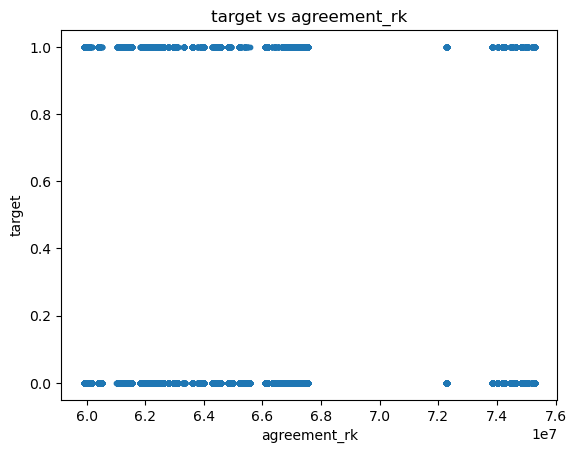

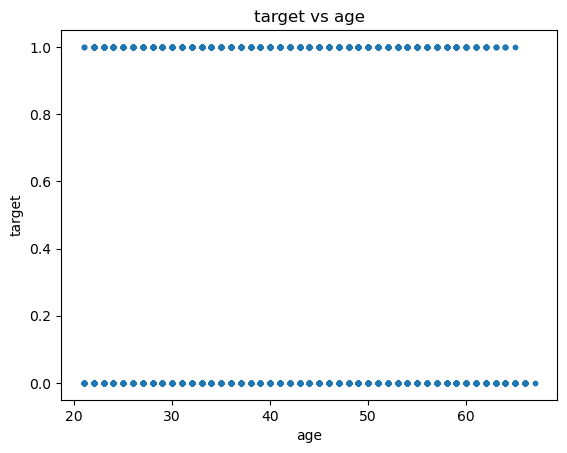

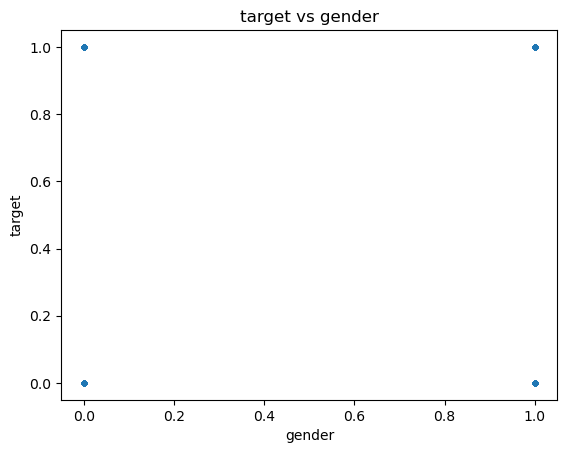

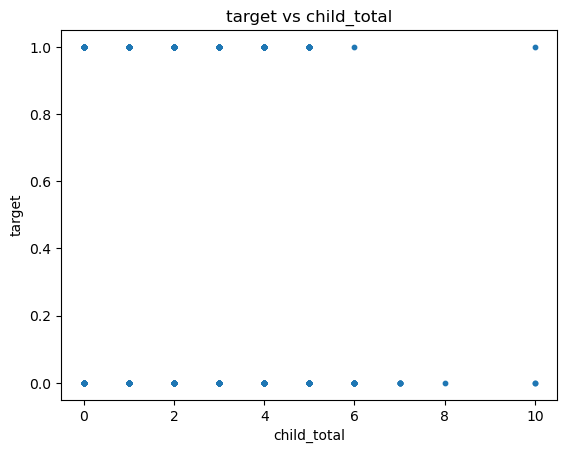

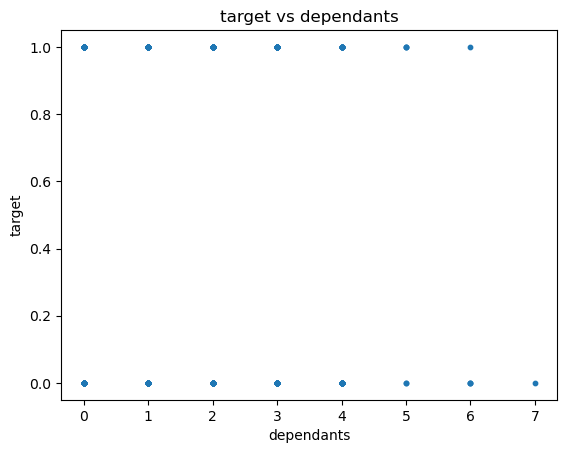

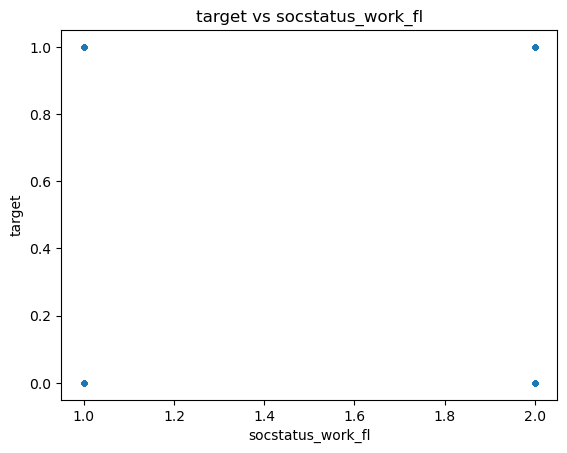

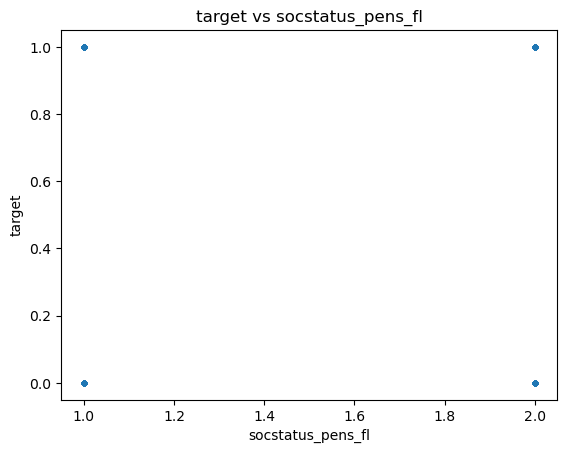

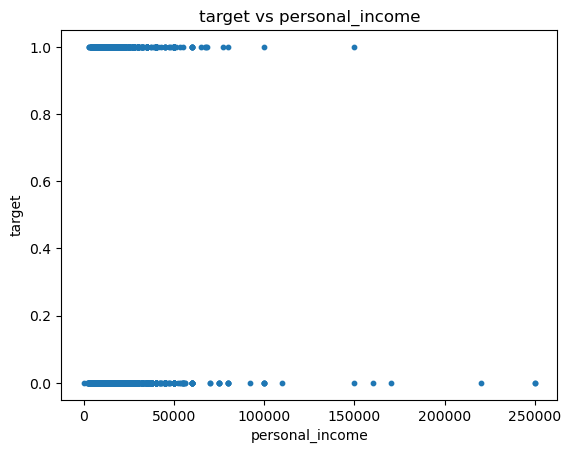

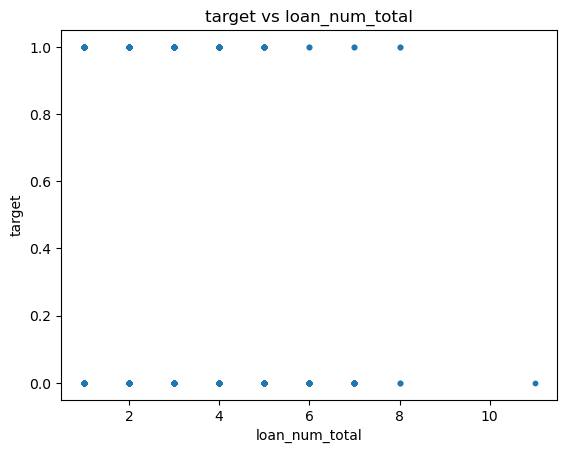

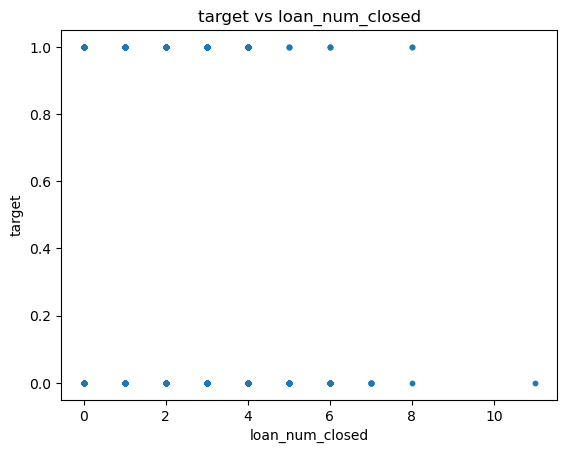

In [10]:
for col in numeric_cols:
    plt.scatter(data[col], data['target'], s=10)
    plt.title('target vs '+col)
    plt.xlabel(col)
    plt.ylabel('target')
    plt.show()

# 3. Обучение методом k ближайших соседей

## 3.1 Разделим на выборки

In [11]:
# раздедлите на обучающую и тестовую выборки

dataset=data.drop("agreement_rk",axis=1)
data_train, data_test = train_test_split(dataset, train_size=0.7, random_state=123)

In [12]:
X_train = data_train.drop("target",axis=1)
y_train = data_train['target']

X_test = data_test.drop("target",axis=1)
y_test = data_test['target']

## 3.2 Обучим

In [13]:
# обучите модель методом ближайших соседей

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

## 3.3. Проверим качество 

In [14]:
print('Точность для обучающей выборки:', knn.score(X_train, y_train))
print('Точность для тестовой выборки:', knn.score(X_test, y_test))

Точность для обучающей выборки: 0.8839499355788699
Точность для тестовой выборки: 0.8696585784840026


In [15]:
# проверьте качество модели с помощью F-мера

# Расчёт F1-меры
f1_train = f1_score(y_train, knn.predict(X_train))
print("F1-train:", f1_train)
f1_test = f1_score(y_test, knn.predict(X_test))
print("F1-test:", f1_test)

F1-train: 0.1075725406935598
F1-test: 0.034976152623211444


In [16]:
# проверьте качество модели с помощью матрицы сопряжённостей
print("Train confusion_matrix:")
confusion_matrix(y_train, knn.predict(X_train))

Train confusion_matrix:


array([[9529,   52],
       [1209,   76]], dtype=int64)

In [17]:
print("Test confusion_matrix:")
confusion_matrix(y_test, knn.predict(X_test))

Test confusion_matrix:


array([[4039,   50],
       [ 557,   11]], dtype=int64)

## 3.4 Матрица сопряженности

In [18]:
from sklearn.metrics import  ConfusionMatrixDisplay

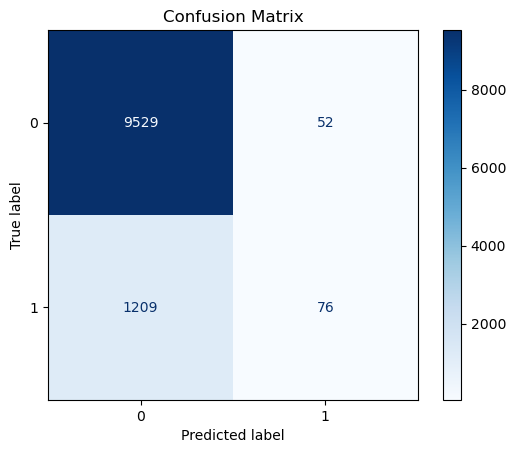

In [19]:
cm_train=confusion_matrix(y_train, knn.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=knn.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

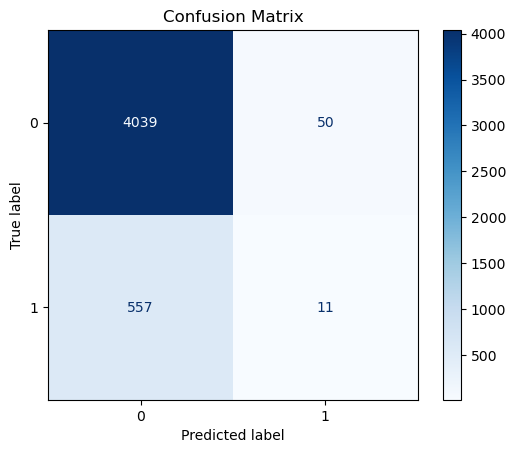

In [20]:
cm_test=confusion_matrix(y_test, knn.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=knn.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

    # сделайте вывод о работе модели

Интерпретация:

    True Negative (TN) = 4039
    → Модель правильно предсказала, что клиент не откликнется

    False Positive (FP) = 50
    → Модель ошибочно решила, что клиент откликнется (лишняя рассылка)

    False Negative (FN) = 557
    → Модель пропустила клиентов, которые действительно откликнулись —  очень важно

    True Positive (TP) = 11
    → Модель правильно нашла откликнувшихся клиентов, но их очень мало

## 3.5 подберем k в цикле

In [21]:
from sklearn.model_selection import LeaveOneOut

In [22]:
score_list = []
f1_list=[]
for k in range(5, 41, 2):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  accuracy=knn.score(X_train, y_train)
  score_list.append([k, accuracy])
  f1 = f1_score(y_train, knn.predict(X_train))
  f1_list.append([k, f1])

In [23]:
score_df = pd.DataFrame(score_list, columns=['k', 'score'])

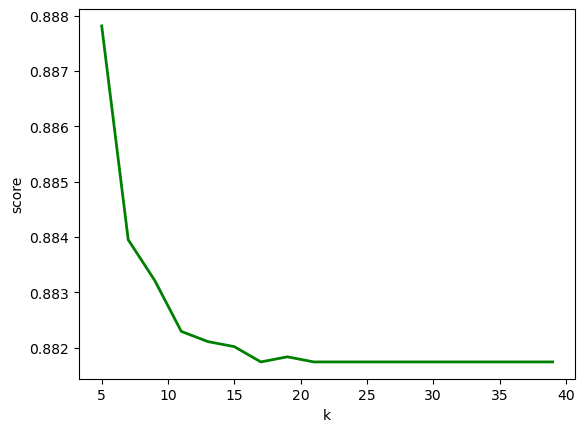

In [24]:
plt.plot(score_df['k'], score_df['score'], linewidth=2, color='g')
plt.xlabel('k')
plt.ylabel('score')
plt.show()

In [25]:
f1_df = pd.DataFrame(f1_list, columns=['k', 'F1'])

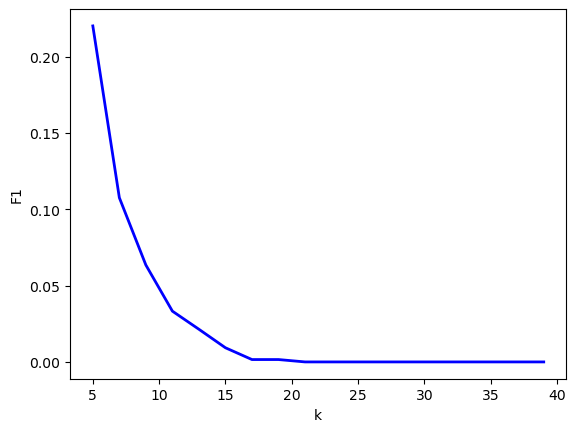

In [26]:
plt.plot(f1_df['k'], f1_df['F1'], linewidth=2, color='b')
plt.xlabel('k')
plt.ylabel('F1')
plt.show()

## 3.6 Попробуем использовать взвешивание

In [27]:
knn = KNeighborsClassifier(n_neighbors=3 , weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [28]:
knn.fit(X_train, y_train)
accuracy_traing=knn.score(X_train, y_train)
f1_train = f1_score(y_train, knn.predict(X_train))
print("accuracy_traing:", accuracy_traing)
print("f1_train:", f1_train)

accuracy_traing: 0.9608871709920854
f1_train: 0.8152976966536288


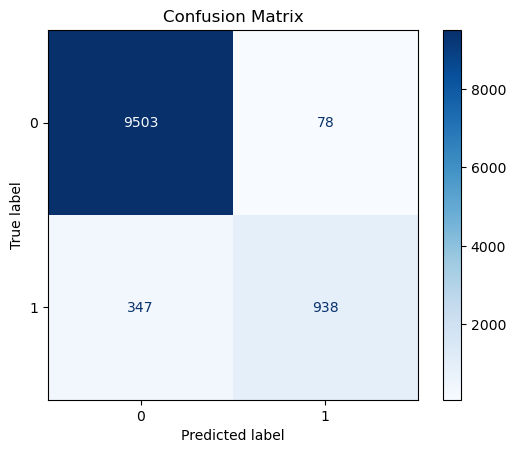

In [29]:
cm_train=confusion_matrix(y_train, knn.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=knn.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [30]:
accuracy_test=knn.score(X_test, y_test)
f1_test = f1_score(y_test, knn.predict(X_test))
print("accuracy_test:", accuracy_test)
print("f1_test:", f1_test)

accuracy_test: 0.8413141507408203
f1_test: 0.13567251461988303


In [31]:
from sklearn.metrics import classification_report

In [32]:
y_pred = knn.predict(X_test)

# Вывод метрик
print(classification_report(y_test, y_pred, digits=2))

# Матрица ошибок (дополнительно)
print('')
print('Матрица ошибок')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4089
           1       0.20      0.10      0.14       568

    accuracy                           0.84      4657
   macro avg       0.54      0.52      0.52      4657
weighted avg       0.80      0.84      0.82      4657


Матрица ошибок
[[3860  229]
 [ 510   58]]


# 4. Нормализация 

In [33]:
# удалим индексный столбец
dataset=data.drop("agreement_rk",axis=1)

# разделите на обучающую и тестовую выборки
data_train, data_test = train_test_split(dataset, train_size=0.7, random_state=123)

In [34]:
X_train = data_train.drop("target",axis=1)
y_train = data_train['target']

X_test = data_test.drop("target",axis=1)
y_test = data_test['target']

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
# создаём scaler и обучаем его на data_train
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [37]:
# применяем трансформацию
X_train_norm = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## 4.1 Обучаем на k-ближайших соседей

In [38]:
#test_normalized

In [39]:
# обучите модель методом ближайших соседей

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
print('Точность для обучающей выборки:', knn.score(X_train_norm, y_train))
print('Точность для тестовой выборки:', knn.score(X_test_norm, y_test))

Точность для обучающей выборки: 0.894993557886987
Точность для тестовой выборки: 0.8526948679407343


In [41]:
# проверьте качество модели с помощью F-мера

# Расчёт F1-меры
f1_train = f1_score(y_train, knn.predict(X_train_norm))
print("F1-train:", f1_train)
f1_test = f1_score(y_test, knn.predict(X_test_norm))
print("F1-test:", f1_test)

F1-train: 0.3822414726583649
F1-test: 0.10209424083769633


## 4.3 Матрица сопряженности

In [42]:
# проверьте качество модели с помощью матрицы сопряжённостей
print("Train confusion_matrix:")
confusion_matrix(y_train, knn.predict(X_train_norm))

Train confusion_matrix:


array([[9372,  209],
       [ 932,  353]], dtype=int64)

In [43]:
print("Test confusion_matrix:")
confusion_matrix(y_test, knn.predict(X_test_norm))

Test confusion_matrix:


array([[3932,  157],
       [ 529,   39]], dtype=int64)

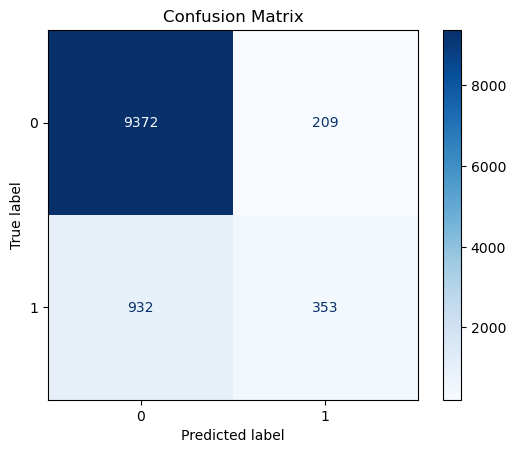

In [44]:
cm_train=confusion_matrix(y_train, knn.predict(X_train_norm))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=knn.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

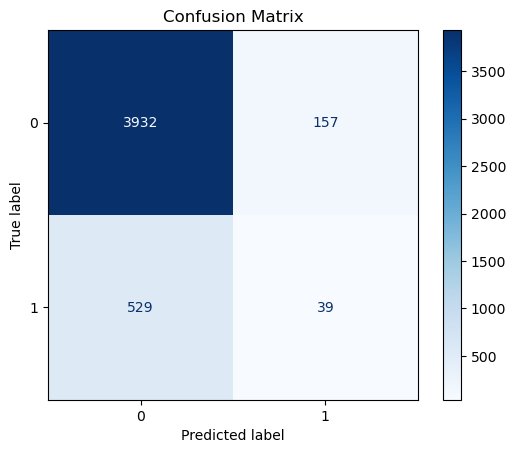

In [45]:
cm_test=confusion_matrix(y_test, knn.predict(X_test_norm))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=knn.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 4.4 Вывод - F1 мера немного возрасла (в 3 раза)

Train: 0.1076  --> 0.3822

Test:  0.0350  --> 0.1021

## 4.5 Попробуем использовать взвешивание

In [46]:
knn = KNeighborsClassifier(n_neighbors=3 , weights='distance')
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [47]:
knn.fit(X_train_norm, y_train)
accuracy_traing=knn.score(X_train_norm, y_train)
f1_train = f1_score(y_train, knn.predict(X_train_norm))
print("accuracy_traing:", accuracy_traing)
print("f1_train:", f1_train)

accuracy_traing: 0.9611632615497884
f1_train: 0.8157205240174672


In [48]:
f1_test = f1_score(y_test, knn.predict(X_test_norm))
print("accuracy_test:", accuracy_traing)
print("f1_test:", f1_test)

accuracy_test: 0.9611632615497884
f1_test: 0.12293144208037825


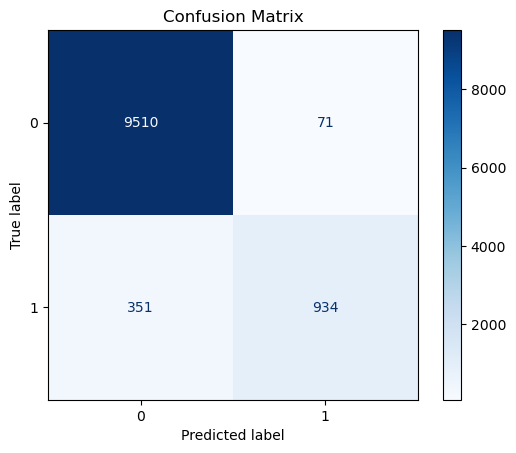

In [49]:
cm_train=confusion_matrix(y_train, knn.predict(X_train_norm))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=knn.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

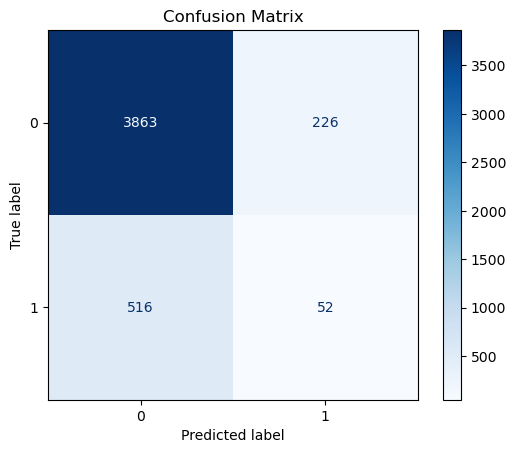

In [50]:
cm_test=confusion_matrix(y_test, knn.predict(X_test_norm))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=knn.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [51]:
# Расчёт F1-меры
f1_train = f1_score(y_train, knn.predict(X_train_norm))
print("F1-train:", f1_train)
f1_test = f1_score(y_test, knn.predict(X_test_norm))
print("F1-test:", f1_test)

F1-train: 0.8157205240174672
F1-test: 0.12293144208037825


## 5 подберем k в цикле с нормализацией и взвешиванием

In [52]:
score_list=[]
f1_test = []
f1_train=[]
for k in range(3, 41, 2):
  knn = KNeighborsClassifier(n_neighbors=k,  weights='distance')
  knn.fit(X_train_norm, y_train)
  accuracy=knn.score(X_train_norm, y_train)
  score_list.append([k, accuracy])
  f1 = f1_score(y_train, knn.predict(X_train_norm))
  f1_train.append([k, f1])

  f1 = f1_score(y_test, knn.predict(X_test_norm))
  f1_test.append([k, f1])    

In [53]:
score_df = pd.DataFrame(score_list, columns=['k', 'score'])

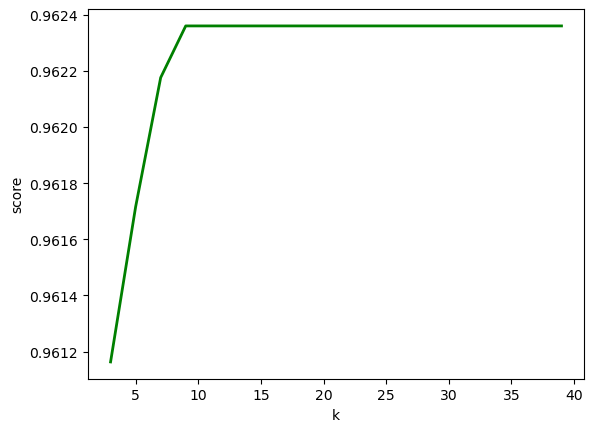

In [54]:
plt.plot(score_df['k'], score_df['score'], linewidth=2, color='g')
plt.xlabel('k')
plt.ylabel('score')
plt.show()

**График F1 на обучающей выборке**

In [55]:
f1_train_df = pd.DataFrame(f1_train, columns=['k', 'F1'])

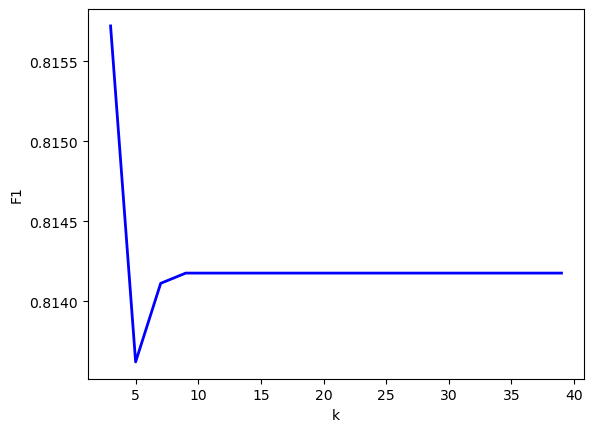

In [56]:
plt.plot(f1_train_df['k'], f1_train_df['F1'], linewidth=2, color='b')
plt.xlabel('k')
plt.ylabel('F1')
plt.show()

**График F1 на тестовой выборке**

In [57]:
f1_test_df = pd.DataFrame(f1_test, columns=['k', 'F1'])

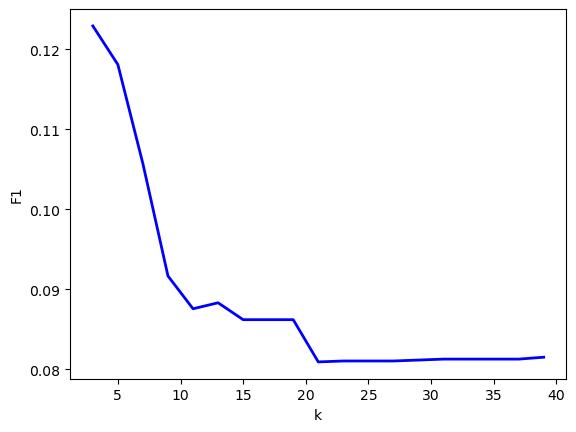

In [58]:
plt.plot(f1_test_df['k'], f1_test_df['F1'], linewidth=2, color='b')
plt.xlabel('k')
plt.ylabel('F1')
plt.show()

# 6. Вывод Модель k ближайших соседей не подходит для данной задачи